#Import Libararies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

#Importing Data

In [22]:
data = {
    "N": [1733.1431391573283, 2266.414257476029, 2859.6337256698584, 3739.5149313337342, 4016.8268940487906, 4016.8268940487906, 5068.201549965845, 5542.28621212141, 5542.28621212141, 7119.1302488196125, 10741.563222358425, 2523.139357690684, 3739.5149313337342, 4718.305237197474, 5642.295428228003, 6868.989281150374, 8362.379167263292, 10180.439250325846, 11958.299697442651, 15088.308328309373, 20818.35374487264, 38240.56553363991, 3127.1241757455273, 4314.703535893884, 6868.989281150374, 8513.276279627325, 10741.563222358425, 12617.415523389967, 20449.333418927163, 17409.09676528405, 20818.35374487264, 26267.424979959935, 36242.9328259216, 50909.1310555097, 93513.34818529357, 216731.4493197829, 7511.521435919625, 11746.349448585826, 15088.308328309373, 18043.08083443102, 24020.50163293628, 24020.50163293628, 29242.833067037092, 38240.56553363991, 38240.56553363991, 48249.710518735854, 63095.67246241588, 87057.34271274495, 115898.41479575932, 165736.0842966633, 1083804.88169194, 14820.857187574999, 20818.35374487264, 30854.635292912193, 44918.70458696813, 44918.70458696813, 64234.27121968767, 63095.67246241588, 78199.40747257383, 102260.59695691991, 126739.56513556777, 232803.8376937169, 559207.4119614395, 1064595.4020670105, 1027188.4574775012, 4697259.803446805, 19294658.125895888, 19294658.125895888, 19294658.125895888, 40168301.82512811, 37395149.31333727, 39456289.72206565, 38756962.005153924],
    "σ": [80.44164231457736, 80.59936861824899, 80.44164231457736, 80.44164231457736, 80.59936861824899, 80.59936861824899, 80.44164231457736, 80.44164231457736, 80.44164231457736, 80.59936861824899, 80.44164231457736, 70.18927373048017, 70.18927373048017, 70.18927373048017, 70.03154742680854, 70.18927373048017, 70.18927373048017, 70.18927373048017, 70.34700003415178, 70.03154742680854, 70.18927373048017, 70.03154742680854, 59.936905146382934, 59.936905146382934, 60.09463867030192, 60.09463867030192, 60.09463867030192, 60.09463867030192, 60.09463867030192, 60.09463867030192, 60.09463867030192, 59.936905146382934, 60.09463867030192, 60.09463867030192, 60.09463867030192, 59.779178842711325, 50.315456217466924, 50.1577299137953, 50.47318252113855, 50.1577299137953, 50.315456217466924, 50.315456217466924, 50.1577299137953, 50.315456217466924, 50.315456217466924, 50.315456217466924, 50.47318252113855, 50.315456217466924, 50.63091604505752, 50.315456217466924, 50.315456217466924, 41.00945989589414, 41.00945989589414, 40.85173359222252, 40.85173359222252, 40.85173359222252, 41.167193419813124, 41.167193419813124, 41.167193419813124, 40.85173359222252, 40.85173359222252, 40.694007288550914, 40.694007288550914, 40.694007288550914, 30.59936500812531, 30.441631484206322, 32.965295664436404, 30.126178876863083, 26.97160948194652, 27.444795613208747, 30.59936500812531, 33.12302918835539, 39.58990150210749],
    "label": ["Failure"] * 66 + ["Runout"] * 7
}

#Creating Dataframe

In [23]:
df = pd.DataFrame(data)

#Convert labels to numerical values

In [24]:
df["label"] = df["label"].map({"Failure": 0, "Runout": 1})
df["log_N"] = np.log10(df["N"])

#Creating the plot

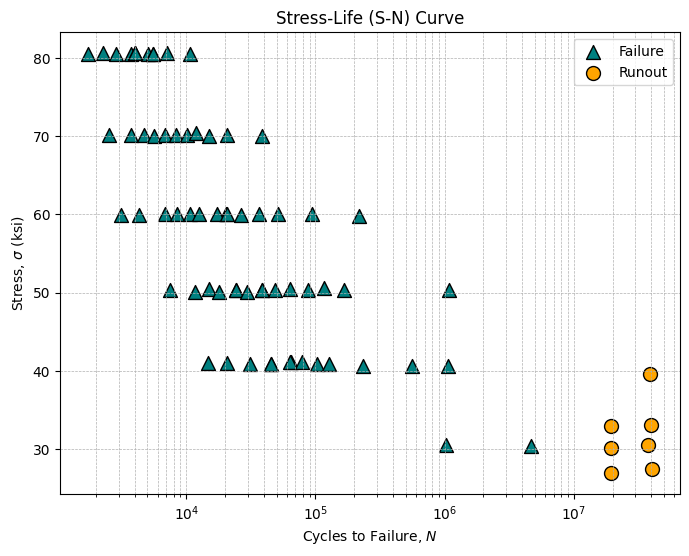

In [25]:
plt.figure(figsize=(8, 6))
for label, marker, color in zip([0, 1], ['^', 'o'], ['teal', 'orange']):
    subset = df[df["label"] == label]
    plt.scatter(subset["N"], subset["σ"], label="Failure" if label == 0 else "Runout",
                marker=marker, color=color, s=100, edgecolor='black')
plt.xscale('log')
plt.xlabel('Cycles to Failure, $N$')
plt.ylabel('Stress, $σ$ (ksi)')
plt.title('Stress-Life (S-N) Curve')
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()

#Preparing data for KNN

In [26]:
X = df[["log_N", "σ"]].values
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Training KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

#Predictions and Accuracy

In [28]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


#Confusion Matrix

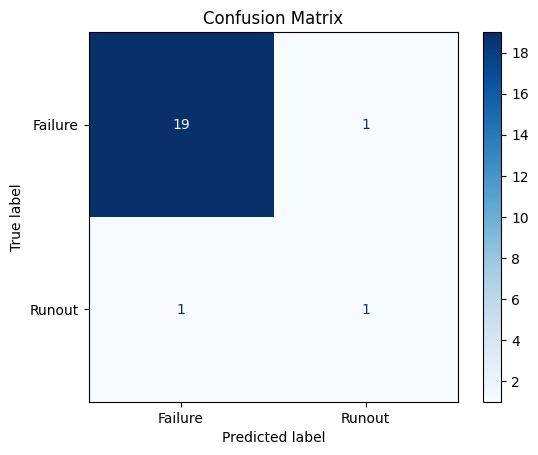

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Failure", "Runout"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()